In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [4]:
def PlotHistoByUncertainty(topic, sInput):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Uncertainty'].isin(sInput.keys())].set_index('Input Uncertainty')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sInput)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [5]:
def PlotHistoByExp(topic, sExp):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Exponent'].isin(sExp.keys())].set_index('Exponent')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sExp)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [6]:
def PlotHistoByX(topic, sX):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Value'].isin(sX.keys())].set_index('Input Value')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sX)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [7]:
def PlotCompare(topic, leftLegend=(1,1), rightLegend=(1,0.2)):
    dfPlot = df.sort_values('Input Uncertainty')
    if 'Value Diff' not in dfPlot.columns:
        dfPlot['Value Diff'] = df['Mean']/df['Value'] - 1
    if 'Uncertainty Diff' not in dfPlot.columns:
        dfPlot['Uncertainty Diff'] = df['Deviation']/df['Uncertainty'] - 1

    fig, ax = plt.subplots()
    ax.set_title('Sampled vs Variance Arithmetic for ' + topic)
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    ax.set_xscale('log')
    ax.set_ylabel('Sampled vs Variance Arithmetic Error Ratio')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Value Diff'], f'g-', label='Mean vs Value')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Uncertainty Diff'], f'b-', label='Deviation vs Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    ax2.plot(dfPlot['Input Uncertainty'], dfPlot['Normalized Error Deviation'], f'm--', label='Error Deviation')

    ax.grid(True)
    ax.legend(bbox_to_anchor=leftLegend)
    ax2.legend(bbox_to_anchor=rightLegend)

In [53]:
def PlotEdge(topic, xLabel, leftLegend=(1.1,1), rightLegend=(1.1,0.2), sigma=0, xlim=[]):
    fig, ax = plt.subplots()
    ax.set_title(f'{topic}')
    ax.set_xlabel(xLabel)
    if xlim:
        ax.set_xlim(xlim)
    ax.set_ylabel(r'Upper Bound $\overline{\delta x}$')
    ax.grid(True)
    ax.plot(df['Edge Value'], df['Edge Uncertainty'], f'k-', label=r'Upper Bound $\overline{\delta x}$')
    if sigma:
            ax.plot(df['Edge Value'], df['Edge Value']/sigma, f'k--', label=r'$\delta x = x/5$')

    ax2 = ax.twinx()
    ax2.set_ylabel('Upper Bound Bias and Uncertainty')
    ax2.plot(df['Edge Value'], df['Bias'], c='gray', ls='--', label='Upper Bound Uncertainty Bias')
    ax2.plot(df['Edge Value'], df['Uncertainty'], c='gray', ls='-', label='Upper Bound Uncertainty')

    ax.legend(bbox_to_anchor=leftLegend)
    ax2.legend(bbox_to_anchor=rightLegend)

# Convergence Edge

## Power

In [54]:
df = pd.read_csv("../Python/Output/PowAtOneEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,-3.00,0.19554,0.354240,16.328714,NotStableException: (1.000000e+00~1.956e-01)**...
1,-2.99,0.19555,0.351324,15.860004,NotStableException: (1.000000e+00~1.956e-01)**...
2,-2.98,0.19557,0.348536,15.466582,NotStableException: (1.000000e+00~1.956e-01)**...
3,-2.97,0.19558,0.345668,15.022060,NotStableException: (1.000000e+00~1.956e-01)**...
4,-2.96,0.19560,0.342922,14.648707,NotStableException: (1.000000e+00~1.956e-01)**...


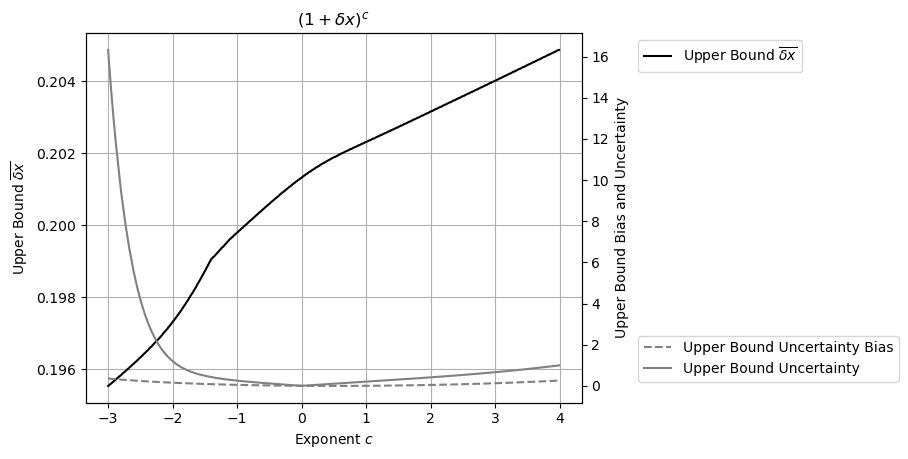

In [58]:
PlotEdge(topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$', rightLegend=(1.1,0.2))

In [11]:
df = pd.read_csv("../Java/Output/PowerAtOneEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,-6.0,0.154,1.894787,6.733063,Type.NotMonotonicException
1,-5.9,0.155,1.873176,6.551142,Type.NotMonotonicException
2,-5.8,0.156,1.851423,6.365573,Type.NotMonotonicException
3,-5.7,0.157,1.829555,6.176838,Type.NotMonotonicException
4,-5.6,0.158,1.807601,5.985428,Type.NotMonotonicException


In [13]:
PlotEdge(lambda edgeVal: 1, topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$')

TypeError: PlotEdge() got multiple values for argument 'topic'

In [ ]:
df = pd.read_csv("../Cpp/Output/PowerAtOneEdge.txt", sep='\t')
df.head()

In [ ]:
PlotEdge(lambda edgeVal: 1, topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$')

## Log

In [59]:
df = pd.read_csv("../Python/Output/LogEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,0.0625,0.0125,-0.021410,0.212005,NotMonotonicException: log(6.250000e-02~1.260e...
1,0.1250,0.0251,-0.021595,0.212976,NotMonotonicException: log(1.250000e-01~2.520e...
2,0.1875,0.0377,-0.021657,0.213301,NotMonotonicException: log(1.875000e-01~3.780e...
3,0.2500,0.0503,-0.021688,0.213464,NotMonotonicException: log(2.500000e-01~5.040e...
4,0.3125,0.0629,-0.021707,0.213561,NotMonotonicException: log(3.125000e-01~6.300e...


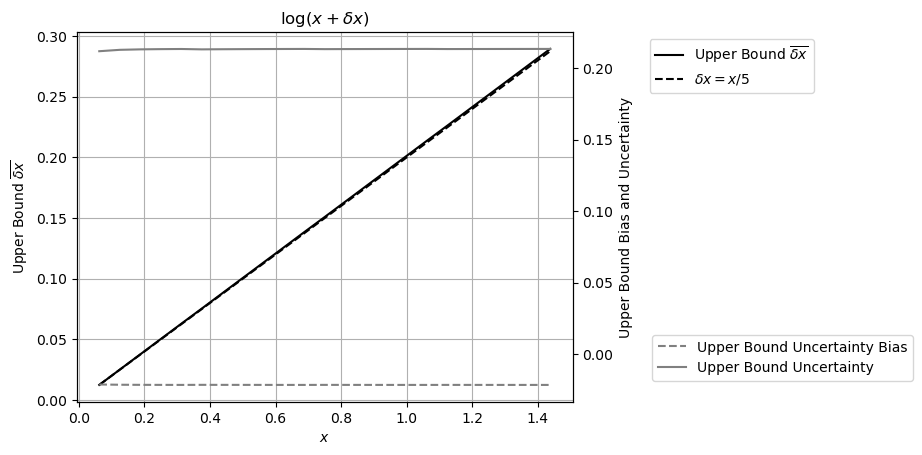

In [62]:
PlotEdge(topic=r'$\log(x + \delta x)$', xLabel=r'$x$', 
         leftLegend=(1.5,1), rightLegend=(1.7,0.2), sigma=5)

In [74]:
df[['Bias', 'Uncertainty']].describe()

,Bias,Uncertainty
count,2.100000e+01,21.000000
mean,4.613792e-02,0.279906
std,5.572192e-07,0.025937
min,4.613702e-02,0.251280
25%,4.613747e-02,0.256986
50%,4.613792e-02,0.273381
75%,4.613837e-02,0.298713
max,4.613882e-02,0.330936


In [ ]:
df = pd.read_csv("../Java/Output/LogEdge.txt", sep='\t')
df.head()

In [ ]:
PlotEdge(lambda edgeVal: np.log(edgeVal), topic=r'$\log(x + \delta x)$', xLabel=r'$x$', leftLegned=(1.2,1), rightLegend=(1.55,0.2), sigma=5)

In [ ]:
df = pd.read_csv("../Cpp/Output/LogEdge.txt", sep='\t')
df.head()

In [ ]:
PlotEdge(lambda edgeVal: np.log(edgeVal), topic=r'$\log(x + \delta x)$', xLabel=r'$x$', rightLegend=(1.45,0.2), sigma=5)

# Sin

In [63]:
df = pd.read_csv("../Python/Output/SinEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,-1.000000,0.318,4.811374e-17,0.657319,NotReliableException: sin(-3.141593e+00~1.002e...
1,-0.984375,0.318,1.927764e-02,0.656892,NotReliableException: sin(-3.092505e+00~1.002e...
2,-0.968750,0.319,3.869560e-02,0.656267,NotReliableException: sin(-3.043418e+00~1.005e...
3,-0.953125,0.320,5.820643e-02,0.654808,NotReliableException: sin(-2.994330e+00~1.008e...
4,-0.937500,0.321,7.776200e-02,0.652536,NotReliableException: sin(-2.945243e+00~1.012e...


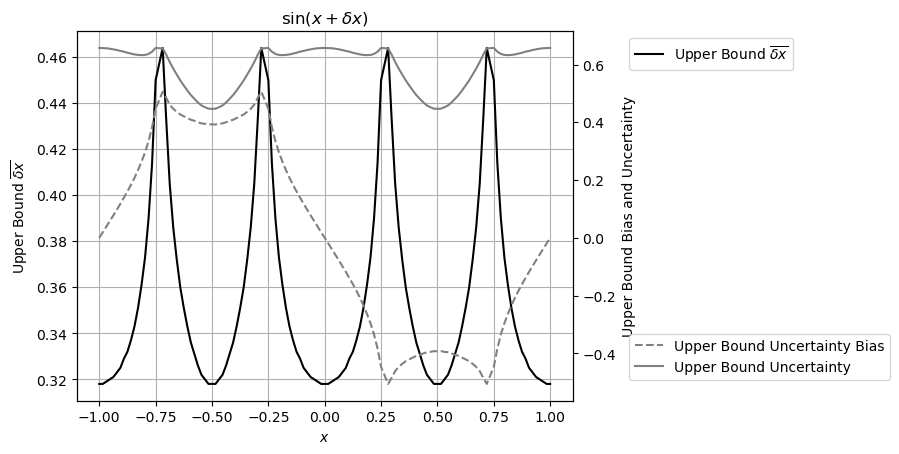

In [64]:
PlotEdge(topic=r'$\sin(x + \delta x)$', xLabel=r'$x$')

# Power

## Square

In [18]:
df = pd.read_csv("../Python/Output/SquareAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2.000000,1,0.2,1.039999,0.403976,1.040700,0.404892,0.001734,1.002266,0,...,0.032656,0.026831,0.021902,0.015865,0.011761,0.008561,0.006459,0.004940,0.003290,0.001358
1,1.999999,1,0.2,1.039999,0.403976,1.037780,0.403727,-0.005495,0.999383,0,...,0.033208,0.025228,0.020247,0.015326,0.011150,0.008443,0.006692,0.004891,0.003361,0.001238
2,2.000001,1,0.2,1.039999,0.403977,1.040154,0.404256,0.000382,1.000691,0,...,0.032952,0.026764,0.019650,0.015716,0.012315,0.009005,0.006731,0.004498,0.003471,0.001348


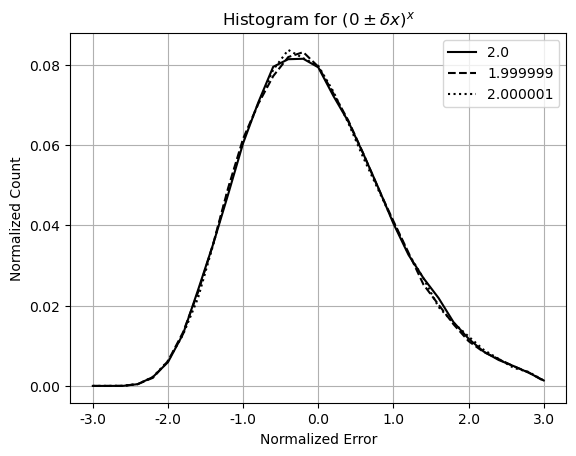

In [19]:
PlotHistoByExp(topic=r'$(0 \pm \delta x)^x$', sExp={2.0: 'k', 1.999999: 'k--', 2.000001: 'k:'})

In [20]:
df = pd.read_csv("../Python/Output/SquareAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,-0.2,0.2,0.079999,0.097976,0.079900,0.097651,-0.001016,0.996681,0,...,0.021559,0.017835,0.014927,0.012131,0.010437,0.008744,0.007173,0.005316,0.004612,0.001908
1,2,-0.1,0.2,0.049999,0.069277,0.049778,0.068607,-0.003199,0.990320,0,...,0.020230,0.015541,0.012424,0.010851,0.009482,0.007673,0.005773,0.005109,0.004332,0.001890
2,2,0.0,0.2,0.039999,0.056563,0.039835,0.056612,-0.002909,1.000857,0,...,0.017427,0.015361,0.012487,0.010186,0.008969,0.007077,0.005932,0.005226,0.004203,0.001933
3,2,0.1,0.2,0.049999,0.069277,0.050002,0.069696,0.000042,1.006035,0,...,0.018721,0.016049,0.013071,0.010747,0.008649,0.007636,0.006233,0.005241,0.004237,0.001801
4,2,0.2,0.2,0.079999,0.097976,0.079939,0.098016,-0.000618,1.000411,0,...,0.022058,0.018078,0.015270,0.011698,0.009391,0.008084,0.007778,0.005655,0.004879,0.002062


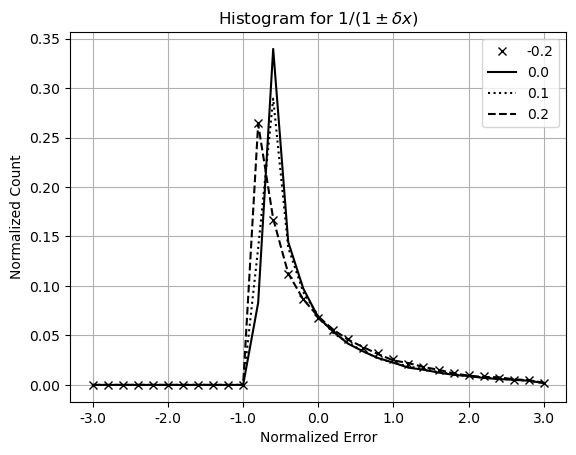

In [21]:
PlotHistoByX(topic=r'$1/(1 \pm \delta x)$', sX={0: 'k', 0.2: 'k--', 0.1: 'k:', -0.2: 'kx'})

## Inversion

In [65]:
df = pd.read_csv("../Python/Output/InversionAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,-1,1,0.199802,1.046137,0.251277,1.046432,0.248001,0.001175,0.986965,0,...,0.024569,0.018140,0.014794,0.011205,0.008183,0.006763,0.004989,0.004198,0.003610,0.001349
1,-1,1,0.100000,1.010316,0.104291,1.009615,0.104123,-0.006720,0.998396,1,...,0.031705,0.024977,0.019327,0.014523,0.011079,0.008742,0.005942,0.004532,0.003243,0.001138
2,-1,1,0.010000,1.000100,0.010004,1.000110,0.010008,0.000963,1.000450,91,...,0.037598,0.029587,0.023000,0.015851,0.011530,0.007139,0.004542,0.003138,0.001975,0.000722
3,-1,1,0.001000,1.000001,0.001000,1.000002,0.001000,0.001390,1.000464,115,...,0.037853,0.030764,0.022792,0.015542,0.010589,0.007190,0.004221,0.002747,0.001755,0.000511
4,-1,1,0.000100,1.000000,0.000100,1.000000,0.000100,-0.002483,0.995863,134,...,0.038826,0.029882,0.021860,0.015552,0.011421,0.007250,0.004222,0.002667,0.001514,0.000431


In [23]:
df['Input Uncertainty'].unique()

array([1.99802e-01, 1.00000e-01, 1.00000e-02, 1.00000e-03, 1.00000e-04])

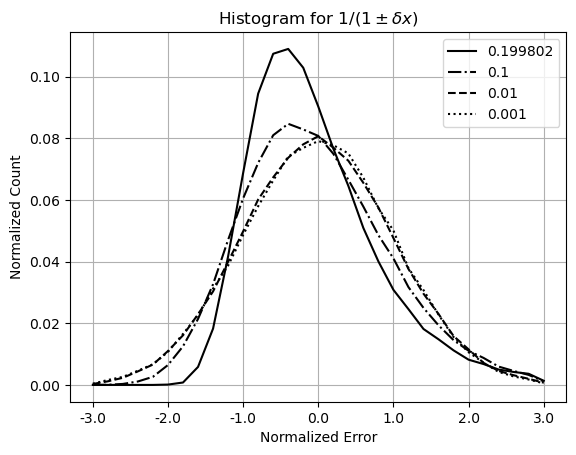

In [24]:
PlotHistoByUncertainty(topic=r'$1/(1 \pm \delta x)$', sInput={0.199802: 'k-', 0.1: 'k-.', 0.01: 'k--', 0.001: 'k:'})

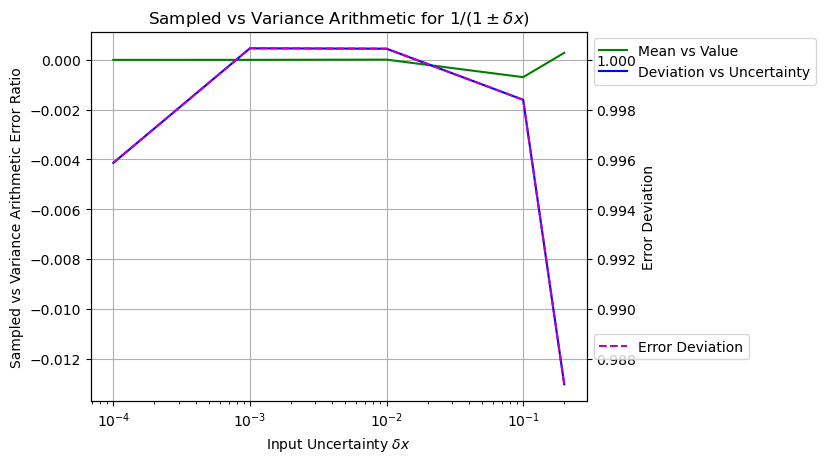

In [25]:
PlotCompare(topic=r'$1/(1 \pm \delta x)$')

## Square Root

In [26]:
df = pd.read_csv("../Python/Output/SquareRootAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.5,1,0.20189,0.994684,0.102972,0.994656,0.103180,-0.000274,1.002024,426,...,0.041898,0.031310,0.022682,0.015278,0.009292,0.005103,0.002732,0.001366,0.000723,0.000191
1,0.5,1,0.10000,0.998738,0.050224,0.998575,0.050304,-0.003253,1.001592,278,...,0.040639,0.030384,0.022577,0.015212,0.009964,0.006372,0.004104,0.002087,0.001054,0.000371
2,0.5,1,0.01000,0.999987,0.005000,1.000018,0.004990,0.006166,0.997968,145,...,0.039291,0.030498,0.022357,0.015610,0.010547,0.007178,0.004602,0.002677,0.001684,0.000531
3,0.5,1,0.00100,1.000000,0.000500,0.999996,0.000500,-0.007780,0.999637,119,...,0.038846,0.030075,0.022055,0.015749,0.011017,0.006907,0.004481,0.002466,0.001514,0.000511


In [27]:
df['Input Uncertainty'].unique()

array([0.20189, 0.1    , 0.01   , 0.001  ])

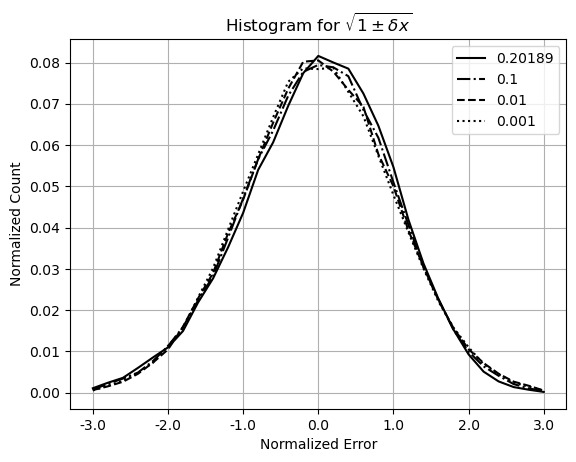

In [28]:
PlotHistoByUncertainty(topic=r'$\sqrt{1 \pm \delta x}$', sInput={0.20189: 'k-', 0.1: 'k-.', 0.01: 'k--', 0.001: 'k:'})

# Natural Power

In [32]:
df = pd.read_csv("../Python/Output/NaturalAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,0.0,0.2,0.039999,0.056563,0.040314,0.057194,0.005556,1.011159,0,...,0.018189,0.015539,0.012572,0.010393,0.008798,0.007345,0.006209,0.005013,0.004378,0.002005
1,2,0.2,0.2,0.079999,0.097976,0.080550,0.098627,0.005622,1.006648,0,...,0.021347,0.018357,0.014704,0.012122,0.010602,0.008561,0.008051,0.005602,0.004969,0.002143
2,3,0.0,0.2,0.000000,0.030972,0.000027,0.031337,0.000881,1.011796,1202,...,0.009160,0.007572,0.005584,0.004642,0.003801,0.003166,0.002807,0.002346,0.001803,0.000779
3,3,0.2,0.2,0.032000,0.061959,0.032025,0.061925,0.000406,0.999450,10,...,0.014793,0.012337,0.010087,0.008665,0.006660,0.006118,0.004603,0.004153,0.003826,0.001688
4,3,-0.2,0.2,-0.032000,0.061959,-0.031718,0.061263,0.004539,0.988765,2165,...,0.001605,0.000930,0.000644,0.000307,0.000215,0.000143,0.000153,0.000031,0.000102,0.000031


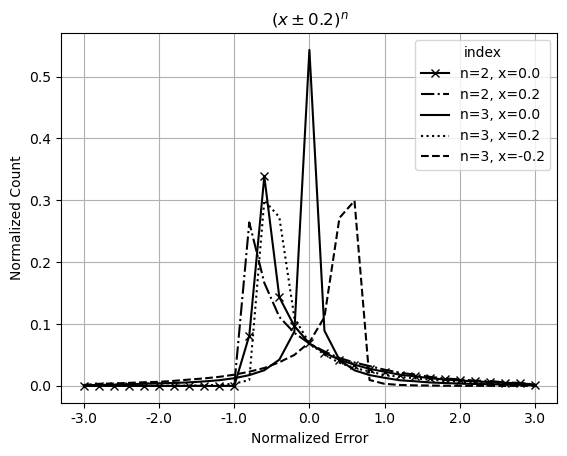

In [43]:
df['index'] = 'n=' + df['Exponent'].astype('str') + ', x=' + df['Input Value'].astype('str')
dfPlot = df.set_index('index')
sHisto = [str(i/10) for i in range(-30, 31, 2)]
ax = dfPlot[sHisto].T.plot(title=r'$(x \pm 0.2)^n$', xlabel='Normalized Error', ylabel='Normalized Count', grid=True,
            style=['k-x', 'k-.', 'k-', 'k:', 'k--'])

## Expansion

In [ ]:
df = pd.read_csv("../Python/Output/PowerExpansion.txt", sep='\t')
df.head()

In [ ]:
df[(df['Input Uncertainty']==0.201) & (df['Order']>100)].head(10)

In [ ]:
def PlotExpansion(topic, param, sInputUncertainty={0.201: '-', 0.200: ':', 0.199: '--'}):
    fig, ax = plt.subplots()
    ax.set_title('Taylor Expansion of Variance for ' + topic)
    ax.set_xlabel('Expansion Order')
    ax.set_ylabel('Taylor Expansion Terms')
    ax.set_yscale('log')
    ax.grid(True)
    
    for unc, style in sInputUncertainty.items():
        dfPlot = df[(df['Parameter']==param) & (df['Input Uncertainty']==unc)].sort_values('Order')
        ax.plot(dfPlot['Order'], dfPlot['New Variance Value'], c='black', ls=style, label=f'Variance $\delta x$={unc}')
        ax.plot(dfPlot['Order'], dfPlot['New Value Value'], c='gray', ls=style, label=f'Value $\delta x$={unc}')
        
    ax.legend(bbox_to_anchor=(1,1))


In [ ]:
PlotExpansion(topic=r'$1/(1 \pm \delta x)$', param=-1)

# Imprecise

In [66]:
df = pd.read_csv("../Python/Output/InversionAtOneEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Bias,Uncertainty,Exception
0,0.00,0.199803,0.046137,0.251280,NotMonotonicException: _imprecise_coeff for 1....
1,0.01,0.199803,0.046137,0.251512,NotMonotonicException: _imprecise_coeff for 1....
2,0.02,0.199803,0.046137,0.252203,NotMonotonicException: _imprecise_coeff for 1....
3,0.03,0.199803,0.046137,0.253350,NotMonotonicException: _imprecise_coeff for 1....
4,0.04,0.199803,0.046137,0.254947,NotMonotonicException: _imprecise_coeff for 1....


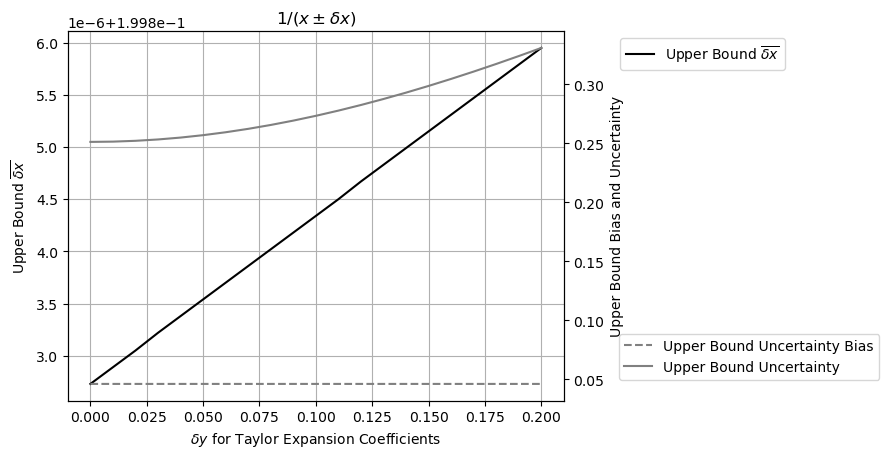

In [71]:
PlotEdge(topic=r'$1/(x \pm \delta x)$', xLabel=r'$\delta y$ for Taylor Expansion Coefficients',  rightLegend=(1.65,0.2))